In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


In [3]:
# 수정된 디렉토리
train_healthy_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/train/healthy'
train_tipburn_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/train/tipburn'
val_healthy_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/val/healthy'
val_tipburn_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/val/tipburn'
test_healthy_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/test/healthy'
test_tipburn_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/test/tipburn'

In [4]:
print('훈련용 건강 이미지 전체 개수:',len(os.listdir(train_healthy_dir)))
print('훈련용 팁번 이미지 전체 개수:',len(os.listdir(train_tipburn_dir)))
print('검증용 건강 이미지 전체 개수:',len(os.listdir(val_healthy_dir)))
print('검증용 팁번 이미지 전체 개수:',len(os.listdir(val_tipburn_dir)))
print('테스트용 건강 이미지 전체 개수:',len(os.listdir(test_healthy_dir)))
print('테스트용 팁번 이미지 전체 개수:',len(os.listdir(test_tipburn_dir)))

훈련용 건강 이미지 전체 개수: 443
훈련용 팁번 이미지 전체 개수: 568
검증용 건강 이미지 전체 개수: 124
검증용 팁번 이미지 전체 개수: 160
테스트용 건강 이미지 전체 개수: 59
테스트용 팁번 이미지 전체 개수: 77


In [5]:
train_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/train'
val_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/val'
test_dir = '/content/drive/MyDrive/AI+X/tip burn/dataset/CNN dataset/test'

In [6]:
# 데이터 전처리
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요하다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1011 images belonging to 2 classes.
Found 284 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [8]:
# 모델 구성

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/20
20/20 [==============================] - 511s 26s/step - loss: 0.6533 - acc: 0.5825 - val_loss: 0.6191 - val_acc: 0.5350
Epoch 2/20
20/20 [==============================] - 308s 16s/step - loss: 0.5909 - acc: 0.6829 - val_loss: 0.4999 - val_acc: 0.7550
Epoch 3/20
20/20 [==============================] - 263s 13s/step - loss: 0.5521 - acc: 0.7275 - val_loss: 0.4427 - val_acc: 0.9300
Epoch 4/20
20/20 [==============================] - 233s 12s/step - loss: 0.4710 - acc: 0.8050 - val_loss: 0.4767 - val_acc: 0.7550
Epoch 5/20
20/20 [==============================] - 211s 11s/step - loss: 0.4168 - acc: 0.8175 - val_loss: 0.4700 - val_acc: 0.7300
Epoch 6/20
20/20 [==============================] - 213s 11s/step - loss: 0.4065 - acc: 0.8525 - val_loss: 0.2985 - val_acc: 0.9050
Epoch 7/20
20/20 [==============================] - 204s 10s/step - loss: 0.3726 - acc: 0.8350 - val_loss: 0.2651 - val_acc: 0.9300
Epoch 8/20
20/20 [==============================] - 198s 10s/step - loss: 0.

In [12]:
from keras.models import load_model
model.save('/content/drive/MyDrive/AI+X/tip burn/model/model.h5')

In [13]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI+X/tip burn/model/model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

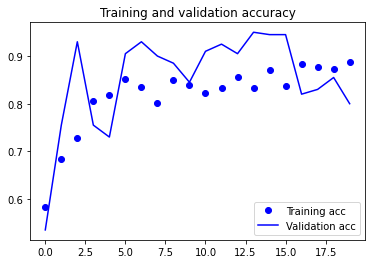

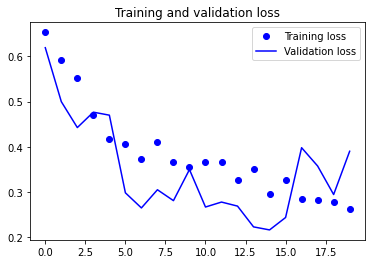

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()